In [14]:
from tetra.utils import viewer
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import tetra.utils.data_loader as dl

In [15]:
dataset_path = "../dataset_sliced/split_1"
class_file = "../classes.txt"

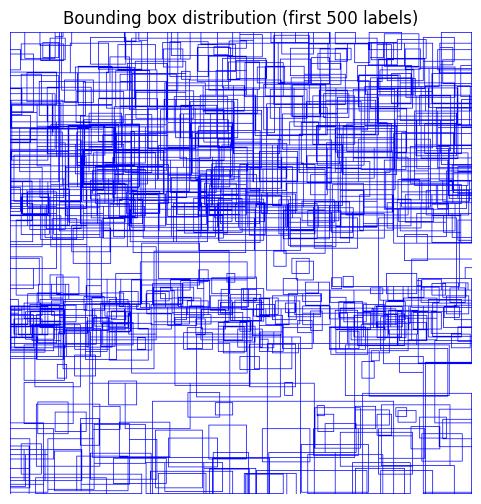

In [16]:
canvas = viewer.view_bb_repartition(
    label_dir="../dataset_sliced/split_1/train/labels",
    img_size=640,
    n=500
)

plt.figure(figsize=(6,6))
plt.imshow(canvas)  # Pas besoin de cvtColor (image blanche en RGB)
plt.axis('off')
plt.title("Bounding box distribution (first 500 labels)")
plt.show()


In [17]:
#Load dataframe of all the bounding boxes
df = dl.df_bb(dataset_path,("train", "val"))
df["x_center"] = df["x_center"].astype(float)
df["y_center"] = df["y_center"].astype(float)
df["width"] = df["width"].astype(float)
df["height"] = df["height"].astype(float)

In [18]:
# Compute aspect ratio and area
df["area"] = (df["width"].astype(float) * df["height"]).astype(float)
df["aspect_ratioWH"] = (df["width"] / df["height"]).astype(float)
df["aspect_ratioHW"] = (df["height"] / df["width"]).astype(float)

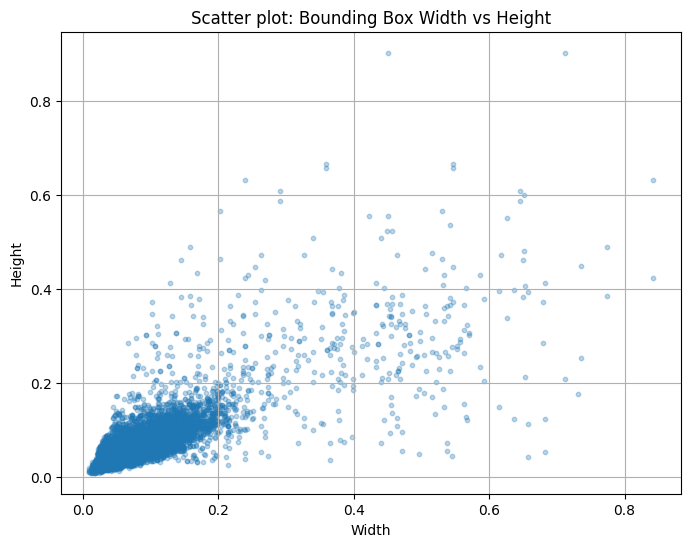

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df["width"], df["height"], alpha=0.3, s=10)
plt.title("Scatter plot: Bounding Box Width vs Height")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)
plt.show()

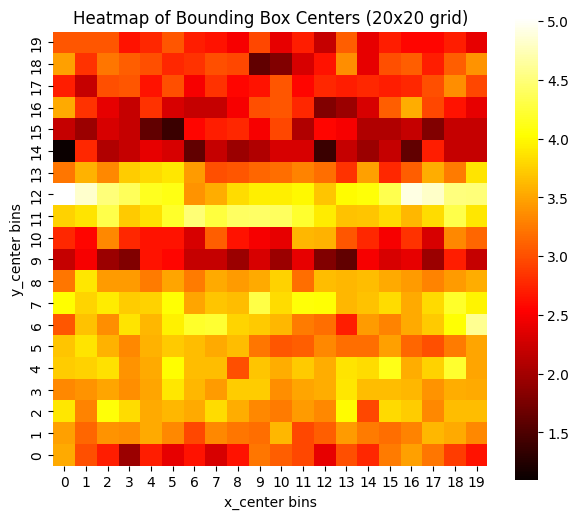

In [20]:
# Paramètres ajustables
nb_bins = 20

# Histogramme 2D avec moins de cases
heatmap, xedges, yedges = np.histogram2d(df["x_center"], df["y_center"], bins=nb_bins, range=[[0, 1], [0, 1]])

# Optionnel : transformation log pour éviter qu’un seul pic écrase tout
heatmap_log = np.log1p(heatmap)  # log(1 + x) évite les problèmes avec 0

# Affichage
plt.figure(figsize=(7, 6))
sns.heatmap(heatmap_log.T, cmap="hot", square=True, cbar=True)
plt.title(f"Heatmap of Bounding Box Centers ({nb_bins}x{nb_bins} grid)")
plt.xlabel("x_center bins")
plt.ylabel("y_center bins")
plt.gca().invert_yaxis()
plt.show()

In [21]:
# sorted df
n = 10
df_sorted = df.sort_values(by="aspect_ratioHW", ascending=False)
df_sorted = df_sorted[:n]

../dataset_sliced/split_1/train/images/05180573_JPG.rf.644ff958eadf5ad08c1f17a6d848a942_465_512_1024_1152_1664.png
['0', '0.967187', '0.142969', '0.065625', '0.285938']
0.01876468125
4.357150476190476


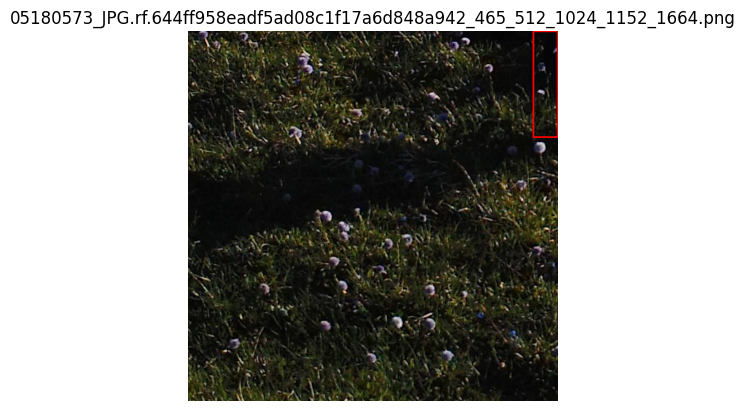

../dataset_sliced/split_1/train/images/06030973_JPG.rf.eb3281638e5cee5c5ae6e53eea599724_2187_512_1024_1152_1664.png
['0', '0.960938', '0.148438', '0.078125', '0.296875']
0.023193359375
3.8


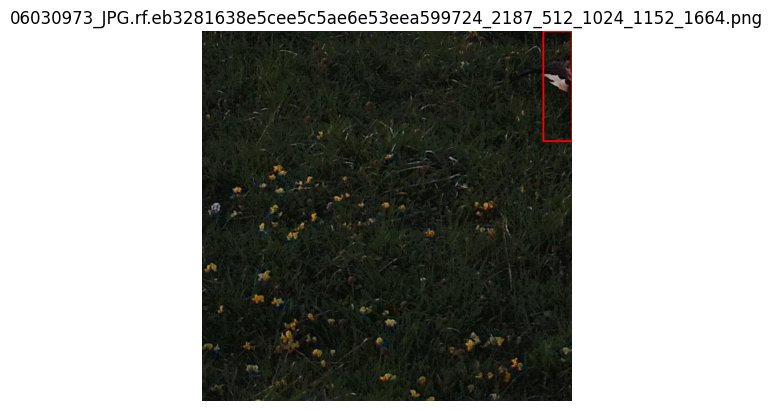

../dataset_sliced/split_1/val/images/05150526_JPG.rf.c87aa06d3e493881082bac940d7c3b1d_543_1536_1304_2176_1944.png
['0', '0.949219', '0.464062', '0.101562', '0.371875']
0.03776836875
3.6615564876627085


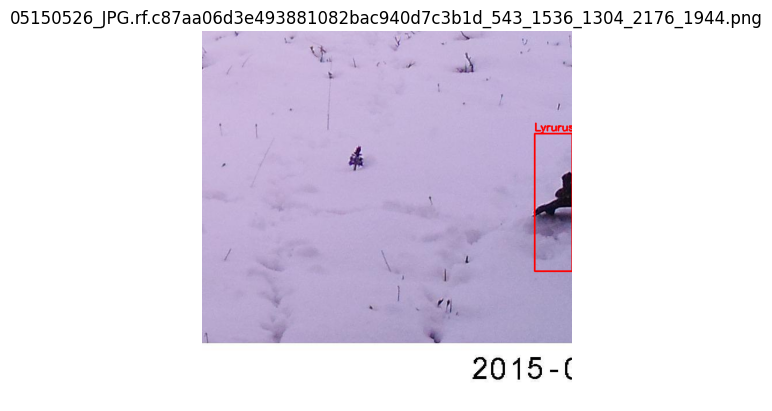

../dataset_sliced/split_1/train/images/05060162_JPG.rf.dea93ec0a27497a6206b53ba5012ebd0_1128_1952_0_2592_640.png
['0', '0.0242188', '0.25', '0.0484375', '0.171875']
0.0083251953125
3.5483870967741935


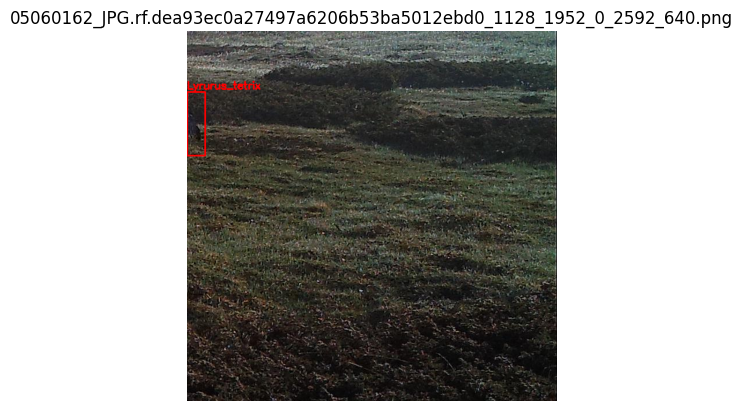

../dataset_sliced/split_1/train/images/05070172_JPG.rf.5b4f62ba85cca7c3c1892c24f7939c2d_2284_0_0_640_640.png
['0', '0.975', '0.438281', '0.05', '0.173437']
['0', '0.757812', '0.457031', '0.21875', '0.176563']
0.00867185
3.46874


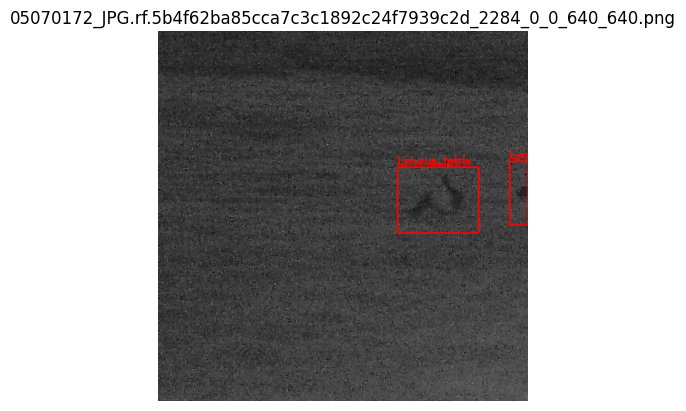

../dataset_sliced/split_1/train/images/05050138_JPG.rf.f85c376474fa402b0663cb154235edbd_1709_512_512_1152_1152.png
['0', '0.0507812', '0.826562', '0.101562', '0.346875']
0.03522931875
3.415401429668577


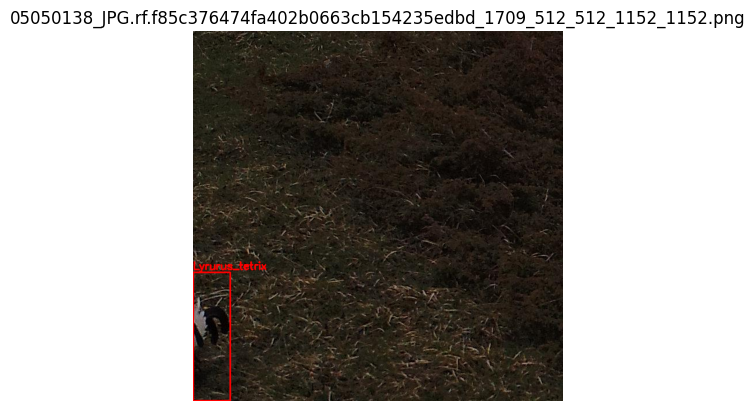

../dataset_sliced/split_1/val/images/05110163v_JPG.rf.b06895d9abde74253c2ed3fb6fecff33_2279_512_1024_1152_1664.png
['0', '0.978125', '0.632031', '0.04375', '0.148438']
0.006494162499999999
3.392868571428571


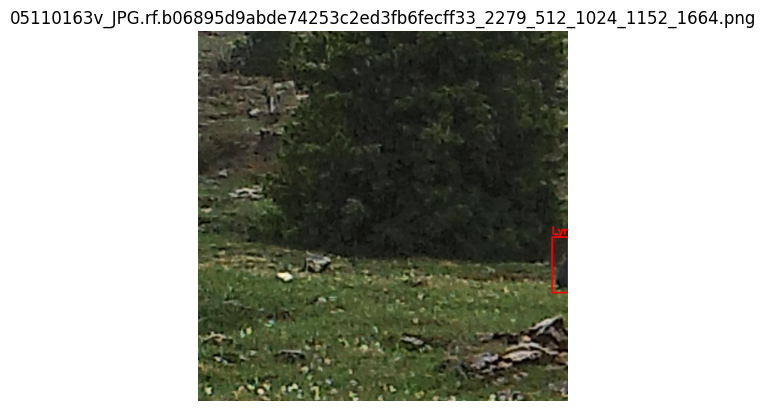

../dataset_sliced/split_1/train/images/06030973_JPG.rf.eb3281638e5cee5c5ae6e53eea599724_2187_512_512_1152_1152.png
['0', '0.960938', '0.869531', '0.078125', '0.260937']
0.020385703124999998
3.3399935999999997


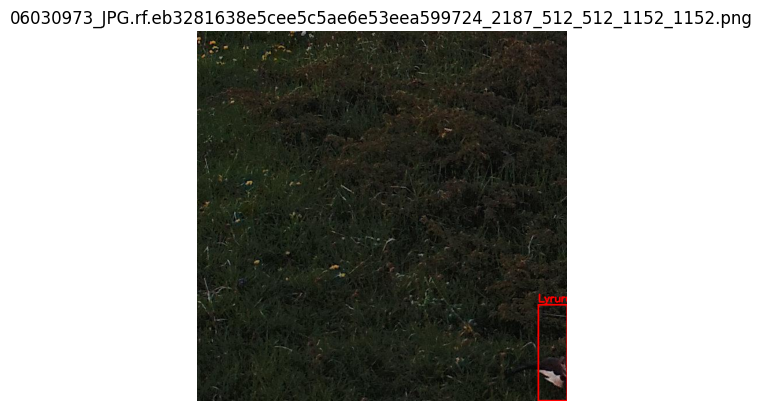

../dataset_sliced/split_1/val/images/05150524_JPG.rf.165c0f947b51ecce9cbd1b61599633ae_349_1536_1024_2176_1664.png
['0', '0.0460938', '0.717969', '0.0921875', '0.301563']
0.027800339062500005
3.27119186440678


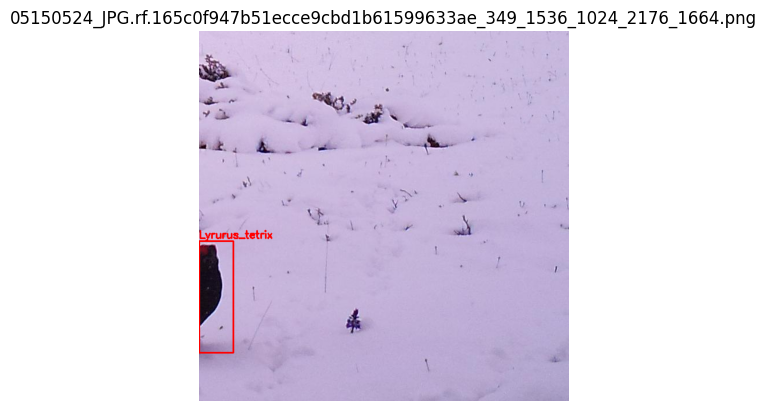

../dataset_sliced/split_1/train/images/05150524_JPG.rf.165c0f947b51ecce9cbd1b61599633ae_349_1536_1304_2176_1944.png
['0', '0.0460938', '0.280469', '0.0921875', '0.301563']
0.027800339062500005
3.27119186440678


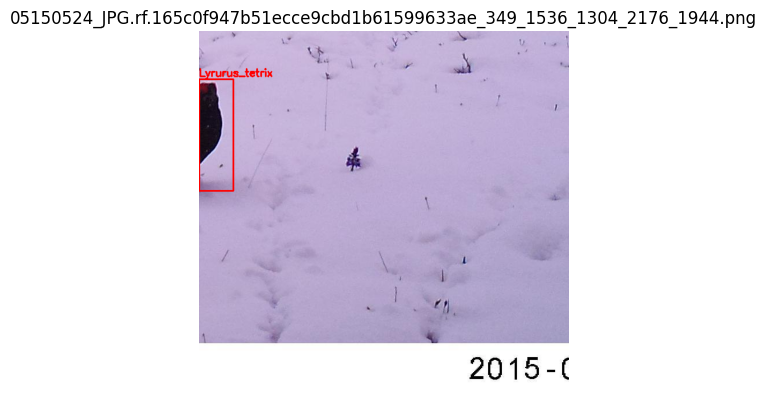

In [22]:
#PRINTING
for _,critical in df_sorted.iterrows():
    image_filename = critical["file"]
    label_filename = image_filename.replace(".png", ".txt")
    critical_img = os.path.join(dataset_path, critical["split"], "images",image_filename)
    critical_label = os.path.join(dataset_path, critical["split"], "labels",label_filename)
    print(critical_img)
    image = viewer.view_image(critical_img, critical_label,class_file)
    plt.imshow(image)
    plt.title(critical["file"])
    plt.axis("off")
    print(critical["area"])
    print(critical["aspect_ratioHW"])
    plt.show()